
## DistilBERT Detector to detect DGA domains.
### Author: Abdulkarim Abdulkadir, s4840933


### Load the libraries
We will load the libraries, and check if we are in the Google Colab environment to pip install ktrain and import the drive mount library. This is to make sure that if the notebook is run locally, it will not execute Google Colab environment commands.

In [1]:
import pandas as pd
import numpy as np
import os
import sys
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install -q ktrain
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True) 

    ## print
    print('Environment: Google Colaboratory Pro+.')
import ktrain
SEED = 42

Mounted at /content/drive
Environment: Google Colaboratory Pro+.


Again we check which environment we are to correctly find the location of the data of our domains

In [16]:
if ENV_COLAB:
  dga_location = '/content/drive/MyDrive/research/DGA_domains/'
  benign_domains = '/content/drive/MyDrive/research/benign_domains/top-1m.csv'
else:
  dga_location = 'data/DGA_domains/'
  benign_domains = 'data/benign_domains/top-1m.csv'

We have a total amount of 19 different DGA types. Including the benign domain data, this will total 20 different types.

In [17]:
dga_domains = [dga for dga in os.listdir(dga_location) if dga.endswith(r".csv")]
print("Total amount of DGA types: ", len(dga_domains))

Total amount of DGA types:  37


## Load the data into arrays
We will only take 200,000 domains of our benign data set, to have almost the same ratio of benign and DGA domains. In total we have 384,765 domains: 200,000 benign domains and 184765 DGA domains.

In [ ]:
dataset = pd.DataFrame()
benign_dataframe = pd.read_csv(benign_domains)
benign_dataframe.insert(1, 'type', 'benign')
benign_dataframe.insert(2, 'class', 0)
dataset = dataset.append(benign_dataframe[:200000], ignore_index=True)
for i, dga in enumerate(dga_domains):
  dga_dataframe = pd.read_csv(dga_location + dga)
  dga_dataframe.insert(1,'type',dga.split(".")[0])
  dga_dataframe.insert(2,'class',1)
  dataset = dataset.append(dga_dataframe, ignore_index=True)

In [ ]:
print("Total amount of DGA domains: ", dataset['class'].value_counts()[1])
print("Total amount of benign domains: ", dataset['class'].value_counts()[0])
print("Total amount of domains: ", len(dataset))
if ENV_COLAB:
  dataset.to_csv('/content/drive/MyDrive/research/dataset', index=False)
else:
  dataset.to_csv('data/dataset', index=False)

Total amount of DGA domains:  184765
Total amount of benign domains:  200000
Total amount of domains:  384765


We will split our data into random train and test subsets. Our test size will be 25%. Our random_state that control the randon number generated has to be given. Popular seeds are 42 or 0. We chose 42 for obvious reasons.

In [3]:
if ENV_COLAB:
  dataset = pd.read_csv('/content/drive/MyDrive/research/dataset')
else:
  dataset = pd.read_csv('data/dataset')

labels = dataset['class']
class_names = labels.unique()
X = dataset.drop(dataset.columns[[2]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    labels,
                                                    test_size=0.25,
                                                    random_state=SEED)

Display the first and last 10 data of our dataset.

In [ ]:
display(dataset.head(10).append(dataset.tail(10)))

,domain,type,class
0,google.com,benign,0
1,netflix.com,benign,0
2,youtube.com,benign,0
3,facebook.com,benign,0
4,microsoft.com,benign,0
5,twitter.com,benign,0
6,instagram.com,benign,0
7,tmall.com,benign,0
8,linkedin.com,benign,0
9,apple.com,benign,0


In [ ]:
print("Size of training set: %s" % (len(x_train)))
print("Size of validation set: %s" % (len(x_test)))

Size of training set: 288573
Size of validation set: 96192


Display the first 10 domains in the train and test dataset respectively.

In [ ]:
display(x_train.head(10).append(x_train.tail(10)))
display(x_test.head(10).append(x_test.tail(10)))


,domain,type
284318,mdgxmdi2nzka.com,sisron
271248,talkhtohmnbkmhrbnod.com,ramnit
362013,xgqcldxsylknwng.co.uk,cryptolocker
274681,hucdkvhprhqbf.com,ramnit
106241,bbvacompass.com,benign
356934,pujamyqywyk.eu,simda
251804,thesetheiroftheright.cn,rovnix
207205,fnkmbukfttf.net,pykspa
324992,slutslenses.az,nymaim
46367,barry-callebaut.com,benign


,domain,type
226382,seraphinaautenberry.net,suppobox
352715,b18i35i55f12ova27e31c69f12i45ayeqcya37ltaq.ru,murofet
48728,lef.org,benign
13920,gapyear.com,benign
15746,damndelicious.net,benign
288103,dibmcuhpb.ga,necurs
233787,hmhbmohaf.mooo.com,kraken
304436,rvcmkvayna.com,alureon
24827,devshed.com,benign
197878,cheddarflow.com,benign


We list all the text models that ktrain offers. For our research we will use the distilbert model. Which is a faster, smaller and distilled version of BERT. 

In [ ]:
ktrain.text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


Specifically, the distilbert base uncased model. This model is trained on uncased English words.

In [4]:
model_name = 'distilbert-base-uncased'
t = ktrain.text.Transformer(model_name, class_names=labels.unique(),
                     maxlen=350)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Drop the 'type' column in the train and test input data. As we need only the domains to train our model. This type is needed in our train and test dataset later on to validate on each specific DGA familytype.

In [5]:
X_train = x_train.drop(x_train.columns[[1]], axis=1).squeeze()
X_test = x_test.drop(x_train.columns[[1]], axis=1).squeeze()

Naming our pre-process train and validation dataset respectively.

In [6]:
train = t.preprocess_train(X_train.tolist(), y_train.to_list())

val = t.preprocess_test(X_test.tolist(), y_test.to_list())
model = t.get_classifier()

preprocessing train...
language: en
train sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

We will find a good learning rate using the learning rate range test to provide valuable information about an optimal learnign rate. To point has to be chosen at which the loss starts descending and the point at which the loss stops descending or becomes ragged. For BERT and DistilBERT models the learning rate that Google recommends is between 5e-5 and 2e-5.

In [ ]:
learner = ktrain.get_learner(model,
                       train_data=train,
                       val_data=val,
                       batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
48095/48095 [==============================] - 7330s 151ms/step - loss: 0.2009 - accuracy: 0.9251
Epoch 2/4
48095/48095 [==============================] - 6647s 138ms/step - loss: 0.3137 - accuracy: 0.8086


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


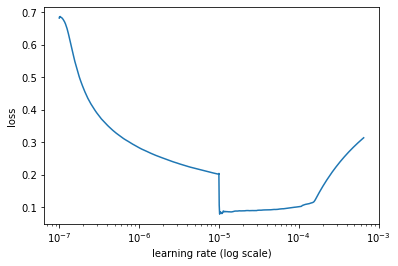

In [ ]:
learner.lr_find(max_epochs=4)
learner.lr_plot()

Based on the plot above we choose 3e-5 as our learning rate. We will fit a model follwing the 1cycle policy.

In [ ]:
learner.fit_onecycle(3e-5, 4)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/4
48096/48096 [==============================] - 7729s 159ms/step - loss: 0.0979 - accuracy: 0.9642 - val_loss: 0.0796 - val_accuracy: 0.9735
Epoch 2/4
48096/48096 [==============================] - 7702s 159ms/step - loss: 0.0561 - accuracy: 0.9812 - val_loss: 0.0562 - val_accuracy: 0.9813
Epoch 3/4
48096/48096 [==============================] - 7701s 159ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0595 - val_accuracy: 0.9837
Epoch 4/4
48096/48096 [==============================] - 7661s 158ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0679 - val_accuracy: 0.9849


Save the learned model to location, so that we can reuse the model without training our dataset again.

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
if ENV_COLAB:
  predictor.save('/content/drive/MyDrive/research/model/')
else: 
  predictor.save('model/')

View observation with top losses in validation dataset. The "n" is the amount of top losses we want to observe.

In [ ]:
learner.view_top_losses(preproc=t, n=1, val_data=None)

----------
id:82070 | loss:13.77 | true:0 | pred:1)



We will validate our model using our test data.

In [8]:
learner.validate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50103
           1       1.00      1.00      1.00     46089

    accuracy                           1.00     96192
   macro avg       1.00      1.00      1.00     96192
weighted avg       1.00      1.00      1.00     96192



array([[49924,   179],
       [  227, 45862]])

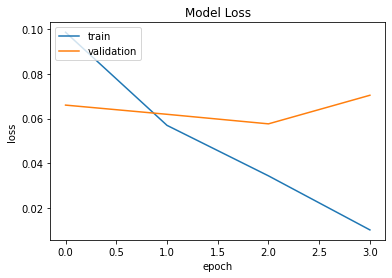

In [ ]:
learner.plot()

In [ ]:
valid_preds = learner.predict()
len(valid_preds), dataset.shape, valid_preds[:5]

(96192, (384765, 3), array([[9.9999881e-01, 1.2130566e-06],
        [9.9527931e-01, 4.7206851e-03],
        [1.8711445e-04, 9.9981290e-01],
        [9.9904853e-01, 9.5149077e-04],
        [1.0452135e-05, 9.9998951e-01]], dtype=float32))

### Model prediction on validation data

Load the saved predictor model to predict on our validation data again. This time we will evaluate and validate each specific DGA family separately.

In [7]:
if ENV_COLAB:
  predictor = ktrain.load_predictor('/content/drive/MyDrive/research/model/')
else:
  predictor = ktrain.load_predictor('model/')
learner = ktrain.get_learner(predictor.model, train_data = train, val_data = val, batch_size = 6)


We check if it still results in the same precision, recall and f1-score value as before saving the model.

In [9]:
learner.validate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50103
           1       1.00      1.00      1.00     46089

    accuracy                           1.00     96192
   macro avg       1.00      1.00      1.00     96192
weighted avg       1.00      1.00      1.00     96192



array([[49924,   179],
       [  227, 45862]])

Find the exact accuracy of our model

In [10]:
learner.evaluate(print_report=False,save_path='/content/drive/MyDrive/research/DistilBERT_detector_classification.csv')

classification report saved to: /content/drive/MyDrive/research/DistilBERT_detector_classification.csv


array([[49924,   179],
       [  227, 45862]])

Compute the ROC-AUC score

In [11]:
y_pred = learner.predict() # predicts validation data by default
y_true = learner.ground_truth() # yields true values from validation data by default
score = roc_auc_score(y_true, y_pred)
print("ROC-AUC score: %.6f \n" % (score))

ROC-AUC score: 0.999664 



We create our validation dataset again so that we can evaluate the dataset on each type of DGA family.

In [12]:
validation_dataset = x_test
validation_dataset.loc[validation_dataset['type'] != 'benign', 'class' ] = 1
validation_dataset.loc[validation_dataset['type'] == 'benign', 'class' ] = 0
validation_dataset['class'] = validation_dataset['class'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [13]:
print(validation_dataset)
print(validation_dataset.shape)

                                               domain         type  class
226382                        seraphinaautenberry.net     suppobox      1
352715  b18i35i55f12ova27e31c69f12i45ayeqcya37ltaq.ru      murofet      1
48728                                         lef.org       benign      0
13920                                     gapyear.com       benign      0
15746                               damndelicious.net       benign      0
...                                               ...          ...    ...
6056                                   livenation.com       benign      0
347606                                    mlqxtil.biz  proslikefan      1
12052                            mcafeewebadvisor.com       benign      0
271122                         oijtwpbesajdnijsmm.com       ramnit      1
269614                           kmcsdpavnstpjmgyb.cc      ranbyus      1

[96192 rows x 3 columns]
(96192, 3)


We evaluate every DGA family separately and save it to the disk.

In [18]:
for dga in dga_domains:
  x_test_per_type = validation_dataset.loc[validation_dataset['type'] == dga.split(".")[0]].iloc[:,0]
  y_test_per_type = validation_dataset.loc[validation_dataset['type'] == dga.split(".")[0]].iloc[:,2]
  validate_per_type = t.preprocess_test(x_test_per_type.to_list(), y_test_per_type.to_list())
  learner.evaluate(test_data=validate_per_type,print_report=False,save_path='/content/drive/MyDrive/research/classifaction_' + dga)


preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_ccleaner.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_corebot.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report saved to: /content/drive/MyDrive/research/classifaction_locky.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_pushdo.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_qadars.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_pizd.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_necurs.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_rovnix.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_simda.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_shiotob.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_suppobox.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_alureon.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_banjori.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_bedep.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_dircrypt.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_tinba.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_zeus-newgoz.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_chinad.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_cryptolocker.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_dyre.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_fobber.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_gozi.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_kraken.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_matsnu.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_murofet.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_nymaim.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_padcrypt.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_proslikefan.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_pykspa.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_qakbot.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_ramdo.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_ramnit.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_ranbyus.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_sisron.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_symmi.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_tempedreve.csv
preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


classification report saved to: /content/drive/MyDrive/research/classifaction_vawtrak.csv


We evaluate the benign domains of our validation dataset and save it as well.

In [19]:
x_test_benign = validation_dataset.loc[validation_dataset['type'] == 'benign'].iloc[:,0]
y_test_benign = validation_dataset.loc[validation_dataset['type'] == 'benign'].iloc[:,2]
validate_benign = t.preprocess_test(x_test_benign.to_list(), y_test_benign.to_list())
learner.evaluate(test_data=validate_benign,print_report=False,save_path='/content/drive/MyDrive/research/classifaction_benign.csv')

preprocessing test...
language: en
test sequence lengths:
	mean : 1
	95percentile : 1
	99percentile : 1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report saved to: /content/drive/MyDrive/research/classifaction_benign.csv


array([[49924,   179],
       [    0,     0]])